# 머신러닝 Regression 모델과 딥러닝 회귀모델 비교

# Regression


## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 딥러닝을 위한 함수들
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from tensorflow.keras.optimizers import Adam # 옵티마이저 설정을 위해서

* 학습곡선 그래프

### (2) 데이터로딩

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn	|	25,000 평방피트를 초과 거주지역 비율	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	black	|	인구 중 흑인 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


## 2.데이터 준비

lstat, ptratio, crim 만 이용하여 medv를 예측하는 모델을 만들어 봅시다.

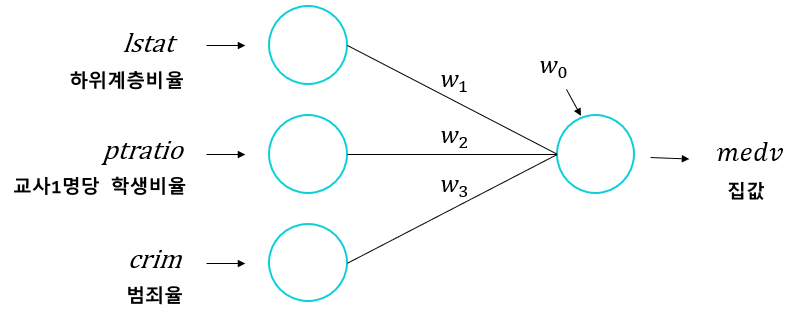

### (1) 데이터 분할1 : x, y 나누기

In [3]:
target = 'medv'
features = ['lstat', 'ptratio', 'crim']
x = data.loc[:, features]
y = data.loc[:, target]

### (2) 변수정리

### (3) NA 조치

### (4) 가변수화

### (5) 데이터분할2

In [4]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 2022)

### (6) Scaling

In [5]:
# 스케일러 선언
scaler = MinMaxScaler()

# train 셋으로 fitting & 적용
x_train = scaler.fit_transform(x_train)

# validation 셋은 적용만!
x_val = scaler.transform(x_val)

## 3.Linear Regression vs. DL

### (1) Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

# 모델 선언
model1 = LinearRegression()

# 학습
model1.fit(x_train, y_train)

# 회귀계수(coefficient, weight, parameter 등 다양한 이름으로 불립니다.)
model1.coef_, model1.intercept_

(array([-30.65674704, -11.08171045,  -2.05183246]), 38.741729734445144)

In [ ]:
features

['lstat', 'ptratio', 'crim']

In [7]:
pred1 = model1.predict(x_val)

### (2) DL

* 모델 설계

In [8]:
# 분석단위 구조
n_features = x_train.shape[1]
n_features

3

In [9]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model2 = Sequential()

# Layer 정의
layer = Dense(1 , input_shape = ( n_features , ))

# 모델에 추가
model2.add(layer)

# 모델요약
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


* compile
    * optimizer = 'adam'    : 기본값으로 옵티마이저 사용(learning_rate = 0.001)
    * optimizer = Adam(lr = 0.1) : 옵션 값 조정 가능
        * lr과 learning_rate은 같지만, learning_rate 사용을 권장

In [10]:
model2.compile(optimizer = 'adam' , loss = 'mse' )

* 학습

In [ ]:
history = model2.fit( x_train, y_train, epochs = 100 , validation_split = .2 ).history

* 학습결과 그래프

In [12]:
# 함수로 만들어서 사용합시다.
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err')
    plt.plot(history['val_loss'], label='val_err')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

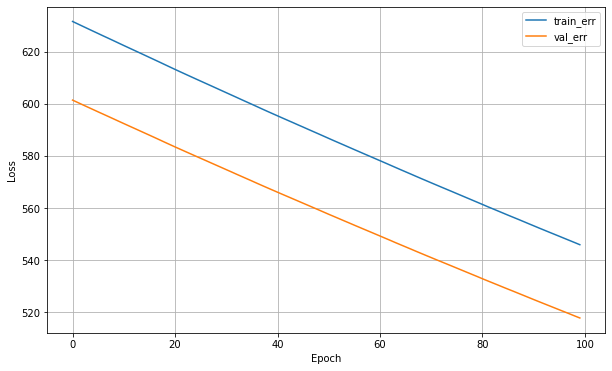

In [13]:
dl_history_plot(history)

In [14]:
pred2 = model2.predict(x_val)

### (3) 모델 비교

#### 1) 가중치 비교

* 선형회귀 : 회귀계수

In [15]:
list(x)

['lstat', 'ptratio', 'crim']

In [16]:
model1.coef_, model1.intercept_

(array([-30.65674704, -11.08171045,  -2.05183246]), 38.741729734445144)

* 딥러닝 : 가중치
    * model.layers : 모델 안의 레이어들
    * model.layers[0].get_weights() : 첫번째 레이어의 가중치 가져오기

In [17]:
model2.layers[0].get_weights()

[array([[1.5372589 ],
        [0.57935435],
        [0.5436291 ]], dtype=float32), array([1.0742878], dtype=float32)]

#### 2) 성능비교

In [18]:
# 선형회귀
print(f'RMSE : {mean_squared_error( y_val  , pred1  , squared = False  )}')
print(f'MAE  : {mean_absolute_error( y_val  , pred1  )}')

RMSE : 5.417347601611183
MAE  : 3.9641306277094874


In [19]:
# DL
print(f'RMSE : {mean_squared_error( y_val , pred2  , squared = False )}')
print(f'MAE  : {mean_absolute_error( y_val , pred2   )}')

RMSE : 20.424381899943803
MAE  : 18.43165728251139


## 4.딥러닝 : 전체 데이터
* 이제 전체 데이터를 가지고 모델링을 시도해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [20]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 2022)

* 스케일링

In [21]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [ ]:
# 분석단위 구조


In [ ]:
# 메모리 정리


# Sequential 타입 모델 선언
model3 = 

# Layer 정의


# 모델에 추가


# 모델요약


* compile

* 학습

* 학습결과 그래프

In [ ]:
dl_history_plot(history)

* 예측 및 평가

## 5.DL2 : hidden layer를 추가해 봅시다.
* 이제 레이어를 추가해 보겠습니다.
* learning_rate도 조정해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [ ]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2
                                                  , random_state = 2022)

* 스케일링

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [ ]:
# 분석단위 구조
nfeatures = x_train.shape[1] #num of columns
nfeatures

In [ ]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential()

# Layer 정의
layer1 = Dense( , input_shape = (nfeatures,), activation = 'relu')
layer2 = Dense( )

# 모델에 추가
model.add(  )
model.add(  )

# 모델요약
model.summary()

* compile

In [ ]:
# optimizer = Adam(lr = 0.1) : 옵션 값 조정 가능
# lr과 learning_rate은 같지만, learning_rate 사용을 권장

model.compile(optimizer =   , loss='mse')

* 학습

In [ ]:
epochs = 100
batch_size = 32 # default 값 32.

history = model.fit(x_train, y_train
                     , epochs = epochs, batch_size = batch_size
                     , validation_split=0.2).history

* 학습결과 그래프

In [ ]:
dl_history_plot(history)

* 예측 및 평가

In [ ]:
pred = model.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')

### (3) 실습1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 112 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 1) | 9 | node |    

In [ ]:
# 메모리 정리


# Sequential 타입 모델 선언


# Layer 정의


# 모델에 추가


# 모델요약


* 컴파일 + 학습

* 학습곡선

* 검증

### (4)실습2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 112 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 4) | 36 | node, activation = 'relu' |
| dense_2 (Dense) | (None, 1) | 5 | node |

In [ ]:
# 메모리 정리


# Sequential 타입 모델 선언


# Layer 정의


# 모델에 추가


# 모델요약


* 컴파일 + 학습

* 학습곡선

* 검증

### (5)실습3

* 이번에는 여러분이 원하는 대로 설계하고, 학습해 봅시다.
* 제일 마지막 노드는 activation을 지정하지 않습니다.

In [ ]:
# 메모리 정리


# Sequential 타입 모델 선언


# Layer 정의


# 모델에 추가


# 모델요약


* 컴파일 + 학습

* 학습곡선

* 검증